In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [161]:
df = pd.read_json("clean_matches.jsonl", lines=True)

df

,match_id,game_duration,game_version,win_0,ban_0_1,ban_0_2,ban_0_3,ban_0_4,ban_0_5,objectives_0_baron_first,...,participant_9_neutralMinionsKilled,participant_9_totalMinionsKilled,participant_9_visionScore,participant_9_championId,participant_9_goldEarned,participant_9_teamPosition,ban_0_8,ban_0_10,ban_1_2,ban_1_4
0,EUW1_6929994252,1677,14.9.580.2108,False,235.0,53.0,222.0,114.0,429.0,False,...,1,29,79,43,8134,UTILITY,NaN,NaN,NaN,NaN
1,EUW1_6929640879,1749,14.9.580.2108,True,72.0,555.0,161.0,61.0,163.0,True,...,0,27,79,267,7936,UTILITY,NaN,NaN,NaN,NaN
2,EUW1_6929622738,911,14.9.580.2108,False,201.0,222.0,-1.0,72.0,555.0,False,...,0,16,27,161,4252,UTILITY,NaN,NaN,NaN,NaN
3,EUW1_6928630994,1582,14.9.580.2108,False,-1.0,72.0,163.0,526.0,555.0,False,...,0,39,56,235,8843,UTILITY,NaN,NaN,NaN,NaN
4,EUW1_6927348867,1567,14.9.580.2108,False,-1.0,-1.0,246.0,555.0,72.0,False,...,0,25,77,497,6138,UTILITY,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,EUW1_6922918225,1997,14.8.578.3867,True,72.0,24.0,29.0,7.0,107.0,False,...,0,64,78,164,9518,UTILITY,NaN,NaN,NaN,NaN
2095,EUW1_6922875235,1112,14.8.578.3867,True,-1.0,29.0,163.0,72.0,555.0,False,...,0,13,34,40,4896,UTILITY,NaN,NaN,NaN,NaN
2096,EUW1_6921573516,1101,14.8.578.3867,True,221.0,234.0,-1.0,200.0,103.0,False,...,0,25,28,117,4767,UTILITY,NaN,NaN,NaN,NaN
2097,EUW1_6921299976,964,14.8.578.3867,False,555.0,72.0,107.0,119.0,222.0,False,...,0,22,32,161,6291,UTILITY,NaN,NaN,NaN,NaN


In [162]:
# Data cleaning

df["ban_0_2"] = df["ban_0_2"].fillna(df["ban_1_2"])
df["ban_0_4"] = df["ban_0_4"].fillna(df["ban_1_4"])
df["ban_1_8"] = df["ban_1_8"].fillna(df["ban_0_8"])
df["ban_1_10"] = df["ban_1_10"].fillna(df["ban_0_10"])

df.drop(["match_id", "game_version", "ban_0_8", "ban_0_10", "ban_1_2", "ban_1_4"], axis=1, inplace=True)
df.replace("", np.nan, inplace=True)
df.dropna(inplace=True)
df = df.replace({"TOP": 0, "JUNGLE": 1, "MIDDLE": 2, "BOTTOM": 3, "UTILITY": 4})

df

/tmp/ipykernel_1865/379237187.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"TOP": 0, "JUNGLE": 1, "MIDDLE": 2, "BOTTOM": 3, "UTILITY": 4})


,game_duration,win_0,ban_0_1,ban_0_2,ban_0_3,ban_0_4,ban_0_5,objectives_0_baron_first,objectives_0_baron_kills,objectives_0_champion_first,...,participant_9_deaths,participant_9_assists,participant_9_champLevel,participant_9_firstBloodKill,participant_9_neutralMinionsKilled,participant_9_totalMinionsKilled,participant_9_visionScore,participant_9_championId,participant_9_goldEarned,participant_9_teamPosition
0,1677,False,235.0,53.0,222.0,114.0,429.0,False,0,False,...,5,11,12,False,1,29,79,43,8134,4
1,1749,True,72.0,555.0,161.0,61.0,163.0,True,1,True,...,7,12,12,False,0,27,79,267,7936,4
2,911,False,201.0,222.0,-1.0,72.0,555.0,False,0,False,...,0,4,7,False,0,16,27,161,4252,4
3,1582,False,-1.0,72.0,163.0,526.0,555.0,False,0,False,...,7,17,14,False,0,39,56,235,8843,4
4,1567,False,-1.0,-1.0,246.0,555.0,72.0,False,0,True,...,7,12,10,False,0,25,77,497,6138,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,1997,True,72.0,24.0,29.0,7.0,107.0,False,1,False,...,11,15,13,False,0,64,78,164,9518,4
2095,1112,True,-1.0,29.0,163.0,72.0,555.0,False,0,True,...,5,5,8,False,0,13,34,40,4896,4
2096,1101,True,221.0,234.0,-1.0,200.0,103.0,False,0,False,...,4,4,9,False,0,25,28,117,4767,4
2097,964,False,555.0,72.0,107.0,119.0,222.0,False,0,True,...,2,7,8,False,0,22,32,161,6291,4


In [163]:
def prepare_dataset(df, features):
    X = df[features]
    y = df["win_0"]

    return train_test_split(X, y, test_size=0.2, random_state=42)

def fit_and_predict(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred, digits=4))
    print(confusion_matrix(y_test, y_pred))
    
    return y_pred

## Prediction with objective features

Feature selection and train/test split

In [164]:
features = [column for column in df.columns if column.startswith("objective")]

X_train, X_test, y_train, y_test = prepare_dataset(df, features)

Model fitting and prediction

In [165]:
y_pred = fit_and_predict(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

       False     0.9729    0.9817    0.9773       219
        True     0.9795    0.9695    0.9745       197

    accuracy                         0.9760       416
   macro avg     0.9762    0.9756    0.9759       416
weighted avg     0.9760    0.9760    0.9760       416

[[215   4]
 [  6 191]]


## Prediction with participant features

In [166]:
features = [column for column in df.columns if column.startswith("participant")]

X_train, X_test, y_train, y_test = prepare_dataset(df, features)
y_pred = fit_and_predict(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

       False     0.9383    0.9726    0.9552       219
        True     0.9683    0.9289    0.9482       197

    accuracy                         0.9519       416
   macro avg     0.9533    0.9508    0.9517       416
weighted avg     0.9525    0.9519    0.9519       416

[[213   6]
 [ 14 183]]


## KDA prediction

In [167]:
values = [
    "kills",
    "deaths",
    "assists"
]
features = [f"participant_{i}_{value}" for i in range(10) for value in values]

X_train, X_test, y_train, y_test = prepare_dataset(df, features)

y_pred = fit_and_predict(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

       False     0.9004    0.9498    0.9244       219
        True     0.9405    0.8832    0.9110       197

    accuracy                         0.9183       416
   macro avg     0.9205    0.9165    0.9177       416
weighted avg     0.9194    0.9183    0.9181       416

[[208  11]
 [ 23 174]]


## Champion and position prediction

In [186]:
values = [
    "championId",
    "teamPosition",
]
features = [f"participant_{i}_{value}" for i in range(10) for value in values]

X_train, X_test, y_train, y_test = prepare_dataset(df, features)

y_pred = fit_and_predict(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

       False     0.5212    0.6164    0.5649       219
        True     0.4650    0.3706    0.4124       197

    accuracy                         0.5000       416
   macro avg     0.4931    0.4935    0.4886       416
weighted avg     0.4946    0.5000    0.4927       416

[[135  84]
 [124  73]]


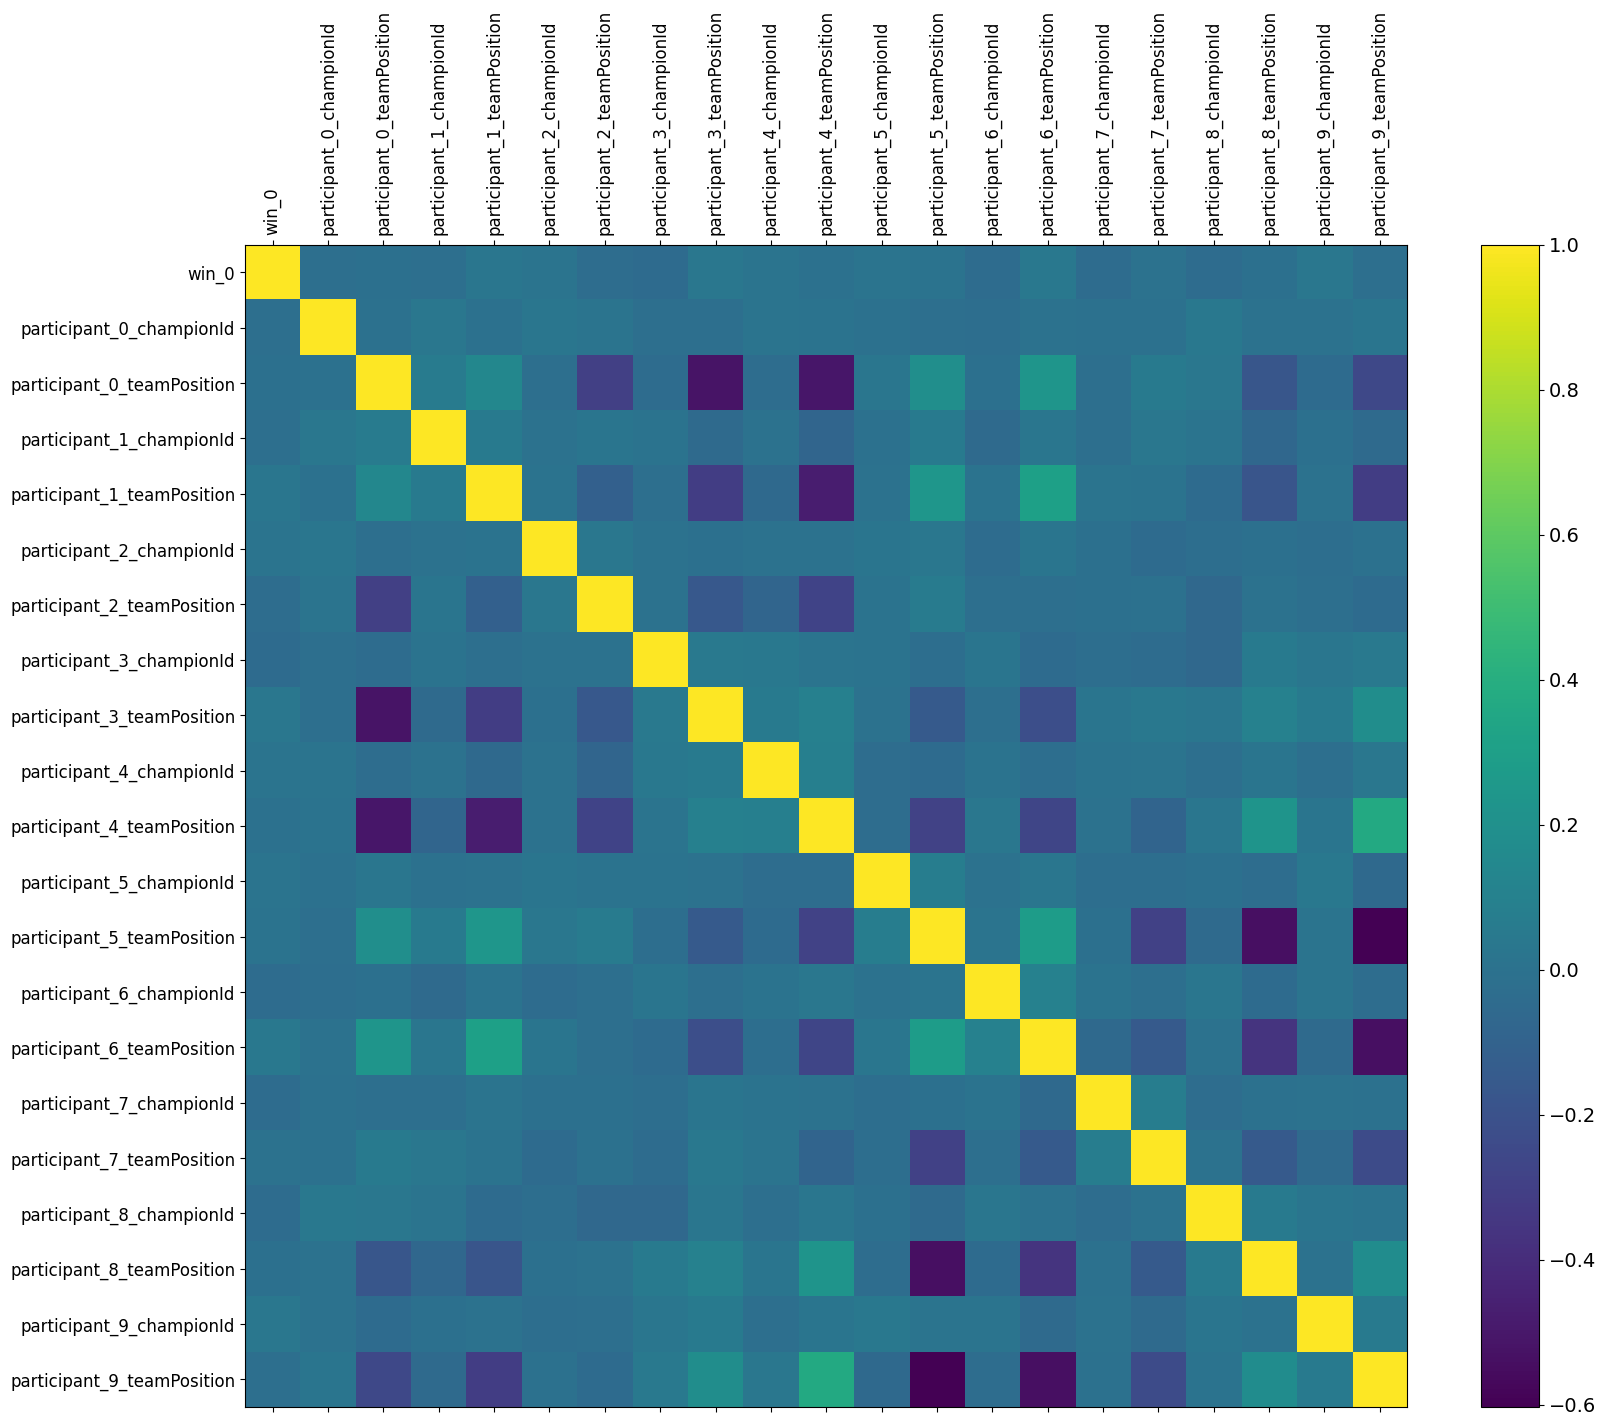

In [189]:
champ_df = df[["win_0", *features]]

f = plt.figure(figsize=(19, 15))
plt.matshow(champ_df.corr(), fignum=f.number)
plt.xticks(range(champ_df.shape[1]), champ_df.columns, fontsize=12,rotation=90)
plt.yticks(range(champ_df.shape[1]), champ_df.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)